# MIE451/1513 Decision Support System -- Data Science Solution

## Be sure to let us know:
i. what location you chose (and remember to sign up on Piazza so there are no duplicates),

ii. what preprocessing steps you implemented


In [ ]:
!pip install emoji

#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk
from nltk.stem import *

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer



import emoji
import string

## Machine Learning
import sklearn
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import CountVectorizer , TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

## Data Visualization
import folium
from tabulate import tabulate
from scipy.stats.kde import gaussian_kde

## Geolocation
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from folium.features import DivIcon

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:

columns = ["source","hotel","reviews","rating","groundtruth","date_stamp","streetAddress","city","province","postalcode"]
reviews_data = pd.read_csv("reviews.csv", header = None, names = columns)

reviews_data.shape

(5145, 10)

In [ ]:
reviews_data.head() # dataset 

,source,hotel,reviews,rating,groundtruth,date_stamp,streetAddress,city,province,postalcode
0,data\ca\154985\1557267\100410346.html,"Four Points by Sheraton Cambridge Kitchener, O...","""Stayed here last 2-3 months for Business.\nBe...",5,positive,"March 16, 2011",210 Preston Pky,Cambridge,Ontario,N3H 5N1
1,data\ca\154985\1557267\100940142.html,"Four Points by Sheraton Cambridge Kitchener, O...","""The pictures of the hotel do not do it justic...",5,positive,"March 21, 2011",210 Preston Pky,Cambridge,Ontario,N3H 5N1
2,data\ca\154985\1557267\101054829.html,"Four Points by Sheraton Cambridge Kitchener, O...","""Being a frequent patron of this hotel, I've c...",5,positive,"March 21, 2011",210 Preston Pky,Cambridge,Ontario,N3H 5N1
3,data\ca\154985\1557267\101401241.html,"Four Points by Sheraton Cambridge Kitchener, O...","""Four Points hotel locates just next to high w...",4,positive,"March 24, 2011",210 Preston Pky,Cambridge,Ontario,N3H 5N1
4,data\ca\154985\1557267\103062897.html,"Four Points by Sheraton Cambridge Kitchener, O...","""We stayed at this property for one night in l...",4,positive,"April 6, 2011",210 Preston Pky,Cambridge,Ontario,N3H 5N1


In [ ]:
df_waterloo = reviews_data[reviews_data["city"]=="Waterloo"] # filtering out only "Waterloo" city data
df_waterloo = df_waterloo.reset_index(drop=True) 

In [ ]:
df_waterloo.head()

,source,hotel,reviews,rating,groundtruth,date_stamp,streetAddress,city,province,postalcode
0,data\ca\181736\10414070\403707082.html,The Inn of Waterloo &amp; Conference Centre,"""Very clean, modern furnishings and a really s...",4,positive,"August 10, 2016",475 King St N,Waterloo,Ontario,N2J 2Z5
1,data\ca\181736\10414070\412731188.html,The Inn of Waterloo &amp; Conference Centre,"""Starting with what is right...the lobby is ve...",3,negative,"August 30, 2016",475 King St N,Waterloo,Ontario,N2J 2Z5
2,data\ca\181736\10414070\417721630.html,The Inn of Waterloo &amp; Conference Centre,"""We went for a two day visit to see our girls ...",4,positive,"September 12, 2016",475 King St N,Waterloo,Ontario,N2J 2Z5
3,data\ca\181736\10414070\418423712.html,The Inn of Waterloo &amp; Conference Centre,"""The room was fine, a little small, but clean ...",3,negative,"September 14, 2016",475 King St N,Waterloo,Ontario,N2J 2Z5
4,data\ca\181736\10414070\422923834.html,The Inn of Waterloo &amp; Conference Centre,"""First of all, the only reason I rated them a ...",3,negative,"September 27, 2016",475 King St N,Waterloo,Ontario,N2J 2Z5


In [ ]:

len(df_waterloo["hotel"].unique())

13

In [ ]:
df_waterloo["hotel"].value_counts() # total reviews per hotel

Homewood Suites by Hilton Waterloo/St. Jacobs, Ontario, Canada    405
Courtyard Waterloo St. Jacobs                                     240
Holiday Inn Express &amp; Suites Waterloo - St. Jacobs Area       215
Best Western Plus Waterloo                                        205
Delta Hotels by Marriott Waterloo                                 202
Comfort Inn Waterloo Ontario                                      135
The Inn of Waterloo &amp; Conference Centre                        65
Colonial Creekside Grand Guest House                               16
Hotel Laurier                                                       5
Staybridge Suites Waterloo - St. Jacobs Area                        5
Waterloo Executive Suites                                           2
HB Guest Home                                                       2
St. Paul&#39;s University College                                   1
Name: hotel, dtype: int64

## DATA PREPROCESSING:

In [ ]:
len(df_waterloo["reviews"])

1498

In [ ]:
# #HappyEmoticons
# emoticons_happy = set([
#     ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',  ############################################
#     ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',     ##Defining different emoticons which can be#
#     '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P', ##used in tweets so that we can filter it ##
#     'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',    ## from our data set to clean the tweets ###
#     '<3'                                                                        ############################################
#     ])

# # Sad Emoticons
# emoticons_sad = set([
#     ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
#     ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
#     ':c', ':{', '>:\\', ';('
#     ])

# emoticons = emoticons_happy.union(emoticons_sad)

In [ ]:
# def remove_emoticons(text):
#     return emoji.get_emoji_regexp().sub(u'', text)

In [ ]:
# df_waterloo["reviews"]= [i for i in df_waterloo["reviews"] if not i in emoticons ]
# df_waterloo["reviews"] = [remove_emoticons(i) for i in df_waterloo["reviews"]]      # cleaning emoticons from the tweets
# df_waterloo["reviews"].head(1)

In [ ]:
# def remove_numbers(text):
  
#   reviews = []
#   for review in text:

#     new_text = re.sub("Date:.*?\n", "", review)
#     new_text = re.sub(r"\d+", "", new_text)       # removing numbers from the corpus 
#     reviews.append(new_text)
#   return reviews

In [ ]:
# def clean_text(text):


#   tokenizer = RegexpTokenizer(r'\w+')
#   stop_words = set(stopwords.words('english')) 

#   stop_words.add('hotel')
#   stop_words.add('room')
#   stop_words.add('rooms')
#   stop_words.add('stay')
#   stop_words.add('staff')
#   stop_words.add('waterloo')
#   stop_words.add('would')
#   stop_words.add('could')
#   stop_words.add('didnt')
#   stop_words.add('wasnt')
#   stop_words.add('right')
#   stop_words.add('next')
#   stop_words.add('day')
#   stop_words.add('one')
#   stop_words.add('like')
#   stop_words.add('front')
#   stop_words.add('back')
#   stop_words.add('even')
#   stop_words.add('get')
#   stop_words.add('need')
#   stop_words.add('first')
#   stop_words.add('one')
#   stop_words.add('two')
#   stop_words.add('told')
#   stop_words.add('said')
#   stop_words.add('werent')

#   wordnet_lemmatizer = WordNetLemmatizer()

#   reviews = []
#   for text in text:

#     text = "".join([i for i in text if i not in string.punctuation])
#     text = tokenizer.tokenize(text.lower())
#     text = [i for i in text if i not in stopwords.words('english')]
#     text = [wordnet_lemmatizer.lemmatize(i) for i in text]
    
#     text = " ".join([PorterStemmer().stem(i) for i in text])
    
#     reviews.append(text)

#   return reviews


In [ ]:
# reviews = remove_numbers(df_waterloo["reviews"])
# clean_reviews = clean_text(reviews)


In [ ]:
# len(clean_reviews)

In [ ]:
# clean_reviews[2]

# Q1

In [ ]:
# Use vader to evaluated sentiment of reviews
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pd.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [ ]:
reviewDF = evalSentences(df_waterloo["reviews"], to_df=True, columns=['reviews','vader'])

100%|██████████| 1498/1498 [00:01<00:00, 836.01it/s]


In [ ]:
reviewDF.head()

,reviews,vader
0,"""Very clean, modern furnishings and a really s...",0.7708
1,"""Starting with what is right...the lobby is ve...",0.1218
2,"""We went for a two day visit to see our girls ...",0.9762
3,"""The room was fine, a little small, but clean ...",0.9684
4,"""First of all, the only reason I rated them a ...",0.9931


In [ ]:
hotel_rating = pd.concat([df_waterloo[["hotel","rating"]], reviewDF], axis=1, sort=False)
hotel_rating.head()

,hotel,rating,reviews,vader
0,The Inn of Waterloo &amp; Conference Centre,4,"""Very clean, modern furnishings and a really s...",0.7708
1,The Inn of Waterloo &amp; Conference Centre,3,"""Starting with what is right...the lobby is ve...",0.1218
2,The Inn of Waterloo &amp; Conference Centre,4,"""We went for a two day visit to see our girls ...",0.9762
3,The Inn of Waterloo &amp; Conference Centre,3,"""The room was fine, a little small, but clean ...",0.9684
4,The Inn of Waterloo &amp; Conference Centre,3,"""First of all, the only reason I rated them a ...",0.9931


##1(a) Calculating average groundtruth rating and vader sentiment rating per hotel

In [ ]:
# calculating average groundtruth rating and vader sentiment rating per hotel

rating_df = pd.DataFrame(hotel_rating.groupby('hotel')['rating'].mean().to_frame(name='mean_ground_truth').reset_index().sort_values('mean_ground_truth',  ascending=False))
vader_df = pd.DataFrame(hotel_rating.groupby('hotel')['vader'].mean().to_frame(name='mean_vader').reset_index().sort_values('mean_vader',  ascending=False))

## 1(b) Rank hotels by avg rating and avg  vader sentiment rating

In [ ]:
#average rating df with hotel ranking

rating_df['ground_truth_rank'] = range(1,14)
rating_df_top_5 = rating_df.head()
rating_df_bottom_5 = rating_df.tail()
rating_df

,hotel,mean_ground_truth,ground_truth_rank
5,HB Guest Home,5.000000,1
10,Staybridge Suites Waterloo - St. Jacobs Area,5.000000,2
12,Waterloo Executive Suites,5.000000,3
1,Colonial Creekside Grand Guest House,4.937500,4
7,"Homewood Suites by Hilton Waterloo/St. Jacobs,...",4.686420,5
4,Delta Hotels by Marriott Waterloo,4.579208,6
6,Holiday Inn Express &amp; Suites Waterloo - St...,4.413953,7
3,Courtyard Waterloo St. Jacobs,4.333333,8
0,Best Western Plus Waterloo,3.990244,9
2,Comfort Inn Waterloo Ontario,3.525926,10


In [ ]:
#average vader df with hotel ranking

vader_df['vader_rank'] = range(1,14)
vader_df_top_5 = vader_df.head()
vader_df_bottom_5 = vader_df.tail()
vader_df

,hotel,mean_vader,vader_rank
10,Staybridge Suites Waterloo - St. Jacobs Area,0.978560,1
1,Colonial Creekside Grand Guest House,0.961994,2
12,Waterloo Executive Suites,0.960300,3
5,HB Guest Home,0.954850,4
7,"Homewood Suites by Hilton Waterloo/St. Jacobs,...",0.881300,5
4,Delta Hotels by Marriott Waterloo,0.878274,6
6,Holiday Inn Express &amp; Suites Waterloo - St...,0.839919,7
3,Courtyard Waterloo St. Jacobs,0.811967,8
0,Best Western Plus Waterloo,0.666948,9
2,Comfort Inn Waterloo Ontario,0.642922,10


In [ ]:
print('Top 5 hotels avg rating vs. avg vader score:')

table = [[i,x, vader_df_top_5['hotel'].iloc[i]] for i, x in enumerate(rating_df_top_5['hotel'])]
headers = ["Rank", "avg Rating", "avg Vader"]

print(tabulate(table, headers, tablefmt="grid"))

Top 5 hotels avg rating vs. avg vader score:
+--------+----------------------------------------------------------------+----------------------------------------------------------------+
|   Rank | avg Rating                                                     | avg Vader                                                      |
+========+================================================================+================================================================+
|      0 | HB Guest Home                                                  | Staybridge Suites Waterloo - St. Jacobs Area                   |
+--------+----------------------------------------------------------------+----------------------------------------------------------------+
|      1 | Staybridge Suites Waterloo - St. Jacobs Area                   | Colonial Creekside Grand Guest House                           |
+--------+----------------------------------------------------------------+----------------------------------

In [ ]:
print('Bottom 5 hotels avg rating vs. avg vader score:')

table = [[i,x, vader_df_bottom_5['hotel'].iloc[i]] for i, x in enumerate(rating_df_bottom_5['hotel'])]
headers = ["Rank", "avg Rating", "avg Vader"]

print(tabulate(table, headers, tablefmt="grid"))

Bottom 5 hotels avg rating vs. avg vader score:
+--------+---------------------------------------------+---------------------------------------------+
|   Rank | avg Rating                                  | avg Vader                                   |
+========+=============================================+=============================================+
|      0 | Best Western Plus Waterloo                  | Best Western Plus Waterloo                  |
+--------+---------------------------------------------+---------------------------------------------+
|      1 | Comfort Inn Waterloo Ontario                | Comfort Inn Waterloo Ontario                |
+--------+---------------------------------------------+---------------------------------------------+
|      2 | The Inn of Waterloo &amp; Conference Centre | St. Paul&#39;s University College           |
+--------+---------------------------------------------+---------------------------------------------+
|      3 | Hotel Laurier 

In [ ]:
df_waterloo[df_waterloo["hotel"] == "HB Guest Home"]["reviews"][1496]

'"The host was very gracious!   She was accomodating to our schedule and our needs!  She was extremely kind and patient with our elderly parents!  Helen\'s house was extremely clean and comfortable!  Our host was able to let us have the entire house for our 6 day visit, while visiting our son at the University of Waterloo!  Every little detail was looked after and we easily communicated with our host using \\"What\'s app\\".  I highly recommend this host\\u002Fhome to others and would gladly stay here on future visits!'

In [ ]:
hotel_rating[hotel_rating["hotel"] == "HB Guest Home"]["vader"]

1496    0.9716
1497    0.9381
Name: vader, dtype: float64

In [ ]:
hotel_rating[hotel_rating["hotel"] == "Staybridge Suites Waterloo - St. Jacobs Area"]["vader"]

82    0.9590
83    0.9895
84    0.9954
85    0.9829
86    0.9660
Name: vader, dtype: float64

In [ ]:
df_waterloo[df_waterloo["hotel"] == "Staybridge Suites Waterloo - St. Jacobs Area"]["reviews"][83]

'"My family and I were at the Staybridge Suites and was a fantastic stay. It is a beautiful hotel with friendly and helpful staff.\\n\\nThe location couldn\\u2019t be better. Just 5 mimutes from the village of St. Jacobs, right across the Farmer\\u2019s Market and Outlet Mall.\\n\\nOur 1-bedroom suite was spotless. Comfortable bed, nice fluffy towels, fully equipped kitchen with a nice view of the Farmer\\u2019s Market. The J. R. Watkins amenities were a nice touch.\\n\\nBreakfast was good and the pool was our favorite area. There is also a splash pad that my kids really enjoyed.\\n\\nI would definitely stay again and I recommend it 100%'

In [ ]:
df_waterloo[df_waterloo["hotel"] == "St. Paul&#39;s University College"]["reviews"][65]

'"The self check-in process didn\'t work for our August 2019 stay. Neither our access code or key fob worked on appropriate doors, and another guest was having the same issue. Because we arrived on a weekend, the office was closed. The college\'s student rep didn\'t seem to believe that we had followed instructions correctly until they tried the door with their own fob and code and also couldn\'t get in. We then had to follow the rep while they looked for doors that would accept their key fob. The college apologized several days later but would not offer a discount on this booking. This part of the campus seems remote, and you will need to use your own phone to call for assistance, so if you are travelling alone or arriving at night you may wish to stay elsewhere.'

- For the average rating and Vader sentiment score, the top 5 hotels are the same but the ranking is different. "HB Guest" hotel, which is ranked first in avg. rating is 4th in vader score. This is because of the number of reviews. HB guest has got only 2 reviews whereas "Staybridge Suites Waterloo - St. Jacobs Area" has got 5 reviews and all are positive. So Vader rating also depends on the length of the reviews. As longer reviews may have more positive words and that could turn into more Vader scores for positive reviews. 
- For the bottom 5 hotels, ranks have got exchanged for avg. rating and Vader rating between "The Inn of Waterloo &amp; Conference Centre" and "St. Paul&#39;s University College".
"St. Paul&#39;s University College" has only one review and that too negative whereas "The Inn of Waterloo &amp; Conference Centre" has 65 reviews which has mixture of reviews and it is clear that it has more than one negative review that means more negative words which contribute more to negative sentiment and that's why it has got the least rank in vader sentiment.  

# Q2

In [ ]:
# df_waterloo["clean_reviews"] = clean_reviews
# df_waterloo.head(3)

## 2(a) : Rank the top-50 most frequent non-stopwords in the review collection

In [ ]:
# separating positive and negative ground trth dataframe

positive_reviews =  df_waterloo[df_waterloo["groundtruth"]=="positive"]
negative_reviews =  df_waterloo[df_waterloo["groundtruth"]=="negative"]
positive_reviews = positive_reviews.reset_index(drop=True)
negative_reviews = negative_reviews.reset_index(drop=True)
print(positive_reviews.shape[0]+negative_reviews.shape[0])

1498


In [ ]:
def get_stop_words():
    stop = set(stopwords.words('english'))
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('stayed')
    stop.add('nthe')
    stop.add('staff')
    stop.add('waterloo')
    stop.add('would')
    stop.add('could')
    stop.add('didnt')
    stop.add('wasnt')
    stop.add('right')
    stop.add('next')
    stop.add('day')
    stop.add('one')
    stop.add('like')
    stop.add('front')
    stop.add('back')
    stop.add('even')
    stop.add('get')
    stop.add('need')
    stop.add('first')
    stop.add('one')
    stop.add('two')
    stop.add('told')
    stop.add('said')
    stop.add('werent')
    stop.add('also')
    stop.add('got')
    stop.add('ask')
    
    return stop

def getTopKWords(df, kwords):

    stop = get_stop_words()
    counter = Counter()

    reviews = df['reviews'].values

    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review)
                            if word.lower() not in stop and len(word) > 2 ])
    topk = counter.most_common(kwords)
    return topk

# Note: You may want to use an NLTK tokenizer instead of a regular expression in the following


In [ ]:
top_50_negative = getTopKWords(negative_reviews, 50)
top_50_negative

[('breakfast', 166),
 ('desk', 111),
 ('clean', 107),
 ('night', 107),
 ('good', 104),
 ('nice', 95),
 ('time', 83),
 ('check', 70),
 ('service', 69),
 ('area', 63),
 ('really', 58),
 ('booked', 58),
 ('place', 56),
 ('water', 54),
 ('bed', 53),
 ('never', 53),
 ('shower', 51),
 ('location', 51),
 ('pool', 47),
 ('floor', 47),
 ('friendly', 46),
 ('well', 46),
 ('morning', 45),
 ('inn', 45),
 ('experience', 44),
 ('parking', 43),
 ('coffee', 43),
 ('price', 43),
 ('people', 42),
 ('little', 42),
 ('restaurant', 42),
 ('asked', 40),
 ('hotels', 40),
 ('door', 39),
 ('food', 39),
 ('another', 39),
 ('nothing', 39),
 ('free', 38),
 ('still', 38),
 ('great', 38),
 ('small', 37),
 ('bathroom', 36),
 ('better', 36),
 ('comfortable', 35),
 ('however', 35),
 ('going', 35),
 ('lot', 34),
 ('days', 34),
 ('much', 34),
 ('call', 33)]

In [ ]:
top_50_positive = getTopKWords(positive_reviews, 50)
top_50_positive

[('clean', 725),
 ('great', 715),
 ('breakfast', 665),
 ('good', 512),
 ('nice', 481),
 ('friendly', 463),
 ('well', 447),
 ('area', 424),
 ('comfortable', 407),
 ('market', 406),
 ('pool', 310),
 ('location', 305),
 ('night', 280),
 ('jacobs', 276),
 ('service', 263),
 ('time', 255),
 ('helpful', 252),
 ('bed', 231),
 ('restaurant', 229),
 ('desk', 227),
 ('recommend', 219),
 ('excellent', 200),
 ('definitely', 198),
 ('close', 187),
 ('spacious', 186),
 ('place', 182),
 ('free', 170),
 ('new', 169),
 ('really', 168),
 ('food', 168),
 ('large', 165),
 ('family', 159),
 ('check', 154),
 ('mall', 152),
 ('suite', 149),
 ('suites', 149),
 ('hot', 145),
 ('everything', 145),
 ('quiet', 141),
 ('visit', 140),
 ('enjoyed', 140),
 ('beds', 140),
 ('away', 139),
 ('parking', 138),
 ('modern', 134),
 ('bathroom', 132),
 ('little', 132),
 ('coffee', 131),
 ('business', 125),
 ('outlet', 124)]

- waterloo(which I have removed with stop words) and Jacobs are the location-specific words. St. Jacob is the farmer's market in Waterloo.
- There are several words appear in both positive and negative top 50 words like "clean", "check","good","nice","great", "bathroom" and "coffee" etc. 
- It is surprising to observe that negative reviews have such positive words as "nice" and "great".

## 2(b) Top-50 noun phrases (using the provided grammar pattern below)

In [ ]:
reviewDF_positive = evalSentences(positive_reviews["reviews"], to_df=True, columns=['reviews','vader'])
reviewDF_negative = evalSentences(negative_reviews["reviews"], to_df=True, columns=['reviews','vader'])

100%|██████████| 244/244 [00:00<00:00, 545.34it/s]


In [ ]:
# This grammar is described in the paper by S. N. Kim,
# T. Baldwin, and M.-Y. Kan.
# Evaluating n-gram based evaluation metrics for automatic
# keyphrase extraction.
# Technical report, University of Melbourne, Melbourne 2010.
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

In [ ]:
tagger = PerceptronTagger()
pos_tag = tagger.tag
chunker = nltk.RegexpParser(grammar)

In [ ]:
# to make the results more useable, we clean up the tree results shown above. 
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
stopword_list = get_stop_words()

# generator, create item one a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word,lemmatizer=lemmatizer, stemmer=stemmer):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word, stopword_list=stopword_list):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopword_list)
    return accepted

# Flatten phrase lists to get tokens for analysis
def flatten_phrase_lists(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [ ]:
def getTopKNP(df, kNPs):

    counter = Counter()
    reviews = df['reviews'].values

    for review in reviews:
            counter.update(flatten_phrase_lists([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(kNPs)
    return topk


In [ ]:
topk_phrase_positive = getTopKNP(positive_reviews, 50) 
topk_phrase_positive

[('st jacob', 143),
 ('farmer market', 98),
 ('homewood suit', 67),
 ('st jacob market', 62),
 ('outlet mall', 45),
 ('hot tub', 32),
 ('complimentari breakfast', 31),
 ('great locat', 29),
 ('great place', 28),
 ('comfort bed', 25),
 ('holiday inn express', 23),
 ('pool area', 22),
 ('short drive', 22),
 ('comfort inn', 19),
 ('good locat', 18),
 ('coffe maker', 18),
 ('minut drive', 17),
 ('holiday inn', 17),
 ('full kitchen', 17),
 ('breakfast buffet', 16),
 ('st jacob farmer market', 16),
 ('minut walk', 16),
 ('queen bed', 15),
 ('breakfast area', 15),
 ('nice touch', 14),
 ('short walk', 14),
 ('st jacob area', 14),
 ('second time', 14),
 ('free breakfast', 14),
 ('custom servic', 13),
 ('bedroom suit', 13),
 ('busi trip', 13),
 ('good size', 13),
 ('conestoga mall', 13),
 ('good place', 11),
 ('indoor pool', 11),
 ('outlet store', 11),
 ('great experi', 11),
 ('good restaur', 11),
 ('great time', 10),
 ('continent breakfast', 10),
 ('hot breakfast', 10),
 ('ground floor', 10),
 

In [ ]:
topk_phrase_negative = getTopKNP(negative_reviews, 50) 
topk_phrase_negative

[('farmer market', 11),
 ('credit card', 11),
 ('comfort inn', 11),
 ('st jacob', 10),
 ('park lot', 9),
 ('custom servic', 8),
 ('free breakfast', 7),
 ('breakfast buffet', 6),
 ('bath tub', 5),
 ('good size', 5),
 ('holiday inn', 5),
 ('hot water', 5),
 ('destin inn', 5),
 ('conestoga mall', 5),
 ('ground floor', 4),
 ('desk clerk', 4),
 ('hot tub', 4),
 ('good locat', 4),
 ('busi trip', 4),
 ('pool area', 3),
 ('toilet seat', 3),
 ('patio door', 3),
 ('big deal', 3),
 ('multipl time', 3),
 ('much time', 3),
 ('kitchen area', 3),
 ('complimentari upgrad', 3),
 ('ice machin', 3),
 ('best western', 3),
 ('complimentari breakfast', 3),
 ('king suit', 3),
 ('cigarett smoke', 3),
 ('air condition', 3),
 ('homewood suit', 3),
 ('reason price', 3),
 ('breakfast coupon', 3),
 ('extra charg', 3),
 ('doubl bed', 3),
 ('desk person', 3),
 ('good night', 3),
 ('small side', 3),
 ('top floor', 3),
 ('entir weekend', 2),
 ('heat unit', 2),
 ('big problem', 2),
 ('liquor licens', 2),
 ('new manag',

- "st jacob market", "breakfast buffet", "conestoga mall", "free breakfast" etc are the common phrases between positive and negative reviews.
- There are not surprising phrases in positive phrases. 

## 2(c) Repeat this analysis again for the top-50 noun phrases using your own defined grammar pattern.

In [ ]:
# grammar_2c = r"""
#     NBAR:
#         {<NN.?>*<VBD.?>*<RB.?>*<RBR.?>*<RBS.?>*<JJ.?>}  # Nouns and Adjectives, terminated with Nouns
        
#     NP:
#         {<NBAR>}
#         {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
# """



In [ ]:
grammar_2c = r"""
    NBAR:
        {<JJ|RB|RBR|RBS>*<NN.*>*<VBD.?>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc..."""

In [ ]:
chunker = nltk.RegexpParser(grammar_2c)

In [ ]:
topk_phrase_positive_2c = getTopKNP(positive_reviews, 50) 
topk_phrase_positive_2c

[('realli enjoy', 15),
 ('hot tub', 13),
 ('complimentari breakfast', 13),
 ('st jacob', 12),
 ('thoroughli enjoy', 10),
 ('breakfast buffet', 9),
 ('well equip', 8),
 ('well maintain', 7),
 ('farmer market', 7),
 ('breakfast includ', 7),
 ('pool area', 7),
 ('realli like', 6),
 ('king bed', 6),
 ('well stock', 6),
 ('king size bed', 6),
 ('includ breakfast', 6),
 ('morn breakfast', 6),
 ('free breakfast', 5),
 ('queen bed', 4),
 ('bedroom suit', 4),
 ('clean bed', 4),
 ('comfort inn', 4),
 ('kid love', 4),
 ('clean breakfast', 4),
 ('absolut love', 3),
 ('breakfast area', 3),
 ('hard boil', 3),
 ('fulli equip', 3),
 ('servic provid', 3),
 ('recept area', 3),
 ('pool look', 3),
 ('nhighli recommend', 3),
 ('comfort bed', 3),
 ('especi enjoy', 3),
 ('never use', 3),
 ('small fridg', 2),
 ('breakfast left', 2),
 ('continent breakfast', 2),
 ('pleasantli surpris', 2),
 ('wi fi', 2),
 ('desk peopl', 2),
 ('recent visit', 2),
 ('realli appreci', 2),
 ('full breakfast includ', 2),
 ('desk at

In [ ]:
topk_phrase_negative_2c = getTopKNP(negative_reviews, 50) 
topk_phrase_negative_2c

[('sofa bed', 5),
 ('toilet seat', 3),
 ('free breakfast', 3),
 ('air condition', 3),
 ('breakfast includ', 3),
 ('breakfast buffet', 3),
 ('ice machin', 2),
 ('bathroom floor', 2),
 ('travel agent', 2),
 ('everyth work', 2),
 ('mine ni', 2),
 ('orang juic machin', 2),
 ('comfort meet', 1),
 ('big problem', 1),
 ('coffe break', 1),
 ('morn partner', 1),
 ('still spill', 1),
 ('still report', 1),
 ('properli clean', 1),
 ('complimentari hot breakfast buffet', 1),
 ('coin oper', 1),
 ('restaur breakfast', 1),
 ('cold cereal', 1),
 ('cheap sausag', 1),
 ('desk wifi', 1),
 ('heavi duti windshield', 1),
 ('food seem', 1),
 ('appetit turn', 1),
 ('tim coffe', 1),
 ('bed made', 1),
 ('busi breakfast', 1),
 ('realli old musti carpet', 1),
 ('pity state shower broken', 1),
 ('old nbreakfast includ', 1),
 ('tri went', 1),
 ('u002faircon unit', 1),
 ('wifi signal', 1),
 ('larg suit girl', 1),
 ('chap tri', 1),
 ('broken window duct tape', 1),
 ('owner carpet torn', 1),
 ('wear washroom', 1),
 ('v

- 1) Compared to 2(b), in this grammar pattern, I have added adverbs also. It captures adjective+noun as well as adverbs+noun patterns. (i.e.  "really appreciate", "pleasantly surprise")
- 2) It also captures verb phrases as I have added verb in the pattern. (i.e. owner carpet torn, broken window, etc)
- 3) There are some of the useful phrases captured with the help of this pattern like (complimentary breakfast which was captured in previous 2(b) but with the recent grammar pattern it has captured " complimentary hot breakfast"

- Source: https://www.guru99.com/pos-tagging-chunking-nltk.html

# Q3

## 3(a) Use mutual information (MI) with ground truth sentiment to rank the top-50 most sentimentbearing non-stopwords in the review collection

In [ ]:
def dataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviews'].values
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotel','rating','groundtruth']].join(finalreviewDf)
    return finaldf


In [ ]:
def NPdataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviews'].values
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten_phrase_lists([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotel','rating','groundtruth']].join(finalreviewDf)
    return finaldf

In [ ]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='groundtruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])])
    miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [ ]:
top_500 =  getTopKWords(df_waterloo, 500) 
len(top_500)

500

In [ ]:
finaldf = dataFrameTransformation(df_waterloo, reviewDF, top_500)

In [ ]:
df_mi = getMI(top_500, finaldf, label_column='groundtruth')

In [ ]:
df_mi.sort_values(by = ['MI Score'],  ascending= False).head(50)

,Word,MI Score
2,great,0.027442
451,dirty,0.021429
164,nothing,0.018807
9,market,0.012723
355,bad,0.012698
156,another,0.012619
85,never,0.012393
421,least,0.011500
16,jacobs,0.011447
5,friendly,0.011062


- Great, dirty, nothing, market, and bad words are the top 5 mutual information bearing words. High MI values show that the expected average PMI of a word given the output is high means it carries more information. Great word is mostly used in a positive sense. It carries the most information related to positive ground-truth. The same goes for other words.  

## 3(b) Repeat this analysis for the top-50 noun phrases using the grammar you found most effective in Q2

In [ ]:
top_500_phrases = getTopKNP(df_waterloo, 500) 
len(top_500_phrases)

500

In [ ]:
finaldf_phrases = NPdataFrameTransformation(df_waterloo, reviewDF, top_500_phrases)

In [ ]:
df_mi_phrases = getMI(top_500_phrases, finaldf_phrases, label_column='groundtruth')

In [ ]:
df_mi_phrases.sort_values(by = ['MI Score'],  ascending= False).head(50)

,Word,MI Score
55,bathroom floor,0.002427
50,ice machin,0.002427
17,sofa bed,0.002260
26,air condition,0.002260
3,st jacob,0.001431
33,everyth work,0.001271
21,toilet seat,0.001271
396,bedroom side decor,0.001213
381,air con unit,0.001213
382,vibrat sound,0.001213


- The top phrases like "bathroom floor", "ice machine", "sofa bed" and "air condition" have high MI scores. This shows that these parameters are extremely important to get good reviews from customers. 
- Hotels should give high priority to proper bed, sofa, clean bathroom floor as this might affect the reputation of the hotel.

# Q4

## 4(a): For ground truth sentiment, calculate the top-50 words according to Pointwise Mutual Information (PMI) of the word occurring 

In [ ]:
# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, topk_word, gt_sentiment, label_column='groundtruth'):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    
    index = [x[0] for x in topk_word]
    pmiDf = pd.DataFrame(index=index, columns=['pmi'])

    for (word, count) in tqdm(topk_word):
        pmiDf.at[word, 'pmi'] = pmiCalc(df,word,gt_sentiment,label_column)
    
    return pmiDf


def pmiCalc(df, word, gt_sentiment, label_column='groundtruth'):
    
    N = df.shape[0]
    
    px = sum(df[label_column]==gt_sentiment)
    py = sum(df[word]==True)
    pxy = len(df[(df[label_column]==gt_sentiment) & (df[word]==True)])

    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)*N/(px*py))
    else:
        pmi = math.log(pxy*N/(px*py))
    return pmi

In [ ]:
pmiposdf = pmiForAllCal(finaldf,top_500,'positive')

100%|██████████| 500/500 [00:01<00:00, 384.04it/s]


In [ ]:
pminegdf = pmiForAllCal(finaldf,top_500,'negative')

100%|██████████| 500/500 [00:01<00:00, 474.25it/s]


In [ ]:
pmiposdf.sort_values(by = ['pmi'],  ascending= False).head(50)

,pmi
screen,0.177792
awesome,0.177792
beyond,0.177792
welcoming,0.158744
highly,0.15799
beautiful,0.154262
touch,0.154262
outlet,0.153301
spotless,0.1531
shops,0.151817


In [ ]:
pminegdf.sort_values(by = ['pmi'],  ascending= False).head(50)

,pmi
dirty,1.68688
smoke,1.54645
smell,1.36843
least,1.35796
non,1.33779
bad,1.32224
someone,1.2711
later,1.26265
tried,1.2551
either,1.2551


- 1) Top-ranked words in both positive and negative reviews are almost all common words. (i.e "Awesome", "welcoming", "beautiful" for positive reviews and "dirty", "smell" and "bad" for negative reviews.
- 2)There are some of the words which do not make any sense like "screen", "beyond" and "highly, etc.
- 3) PMI is high for less frequent words, this might affect the PMI scores and that's why we observe some less informative words at the top of the ranking list. 
- 4) There are some words in positive reviews which are local specific like "shop", "malls" etc.

## 4(b) : Repeat this analysis for the top-50 noun phrases

In [ ]:
pmiposdf_phrases = pmiForAllCal(finaldf_phrases,top_500_phrases,'positive')
pminegdf_phrases = pmiForAllCal(finaldf_phrases,top_500_phrases,'negative')

100%|██████████| 500/500 [00:01<00:00, 497.21it/s]


In [ ]:
pmiposdf_phrases.sort_values(by = ['pmi'],  ascending= False).head(50)

,pmi
coffe maker work,0.177792
walk nwe,0.177792
littl hvac unit,0.177792
properti turn,0.177792
bistro restaur,0.177792
nice kept,0.177792
new restaur concept,0.177792
winter visit,0.177792
promptli breakfast,0.177792
alway felt,0.177792


In [ ]:
pminegdf_phrases.sort_values(by = ['pmi'],  ascending= False).head(50)

,pmi
local bottl,1.81472
whole place felt,1.81472
colleg apolog,1.81472
key fob work,1.81472
coffe cup replenish,1.81472
night nstaff,1.81472
cold coffe soggi scrambl,1.81472
minor stuff breakfast,1.81472
door scratch,1.81472
park lot love,1.81472


- PMI for the top 50 positive phrases are the same and also PMI for negative reviews are the same. 
- Coffee maker, pretty lobby, bistro restaurant, nicely kept and cozy couch, etc. all these phrases are equally important to gauge the quality of the hotel and this has the same PMI as the probability would be the same for each phrase. The coffee maker also came in MI top phrases. This makes it an extremely important parameter. 
- door scratch, coffee cup replenish, cold coffee, carpet floor phrases appear in the top 50 negative reviews PMI. This represents the service parameters. All these phrases carry the same information as they have the same PMI. 

## 4(c): Repeat this analysis for the single top and single bottom hotel 

In [ ]:
top_hotel_name  = rating_df["hotel"].values[1]
print("Top Hotel Name:" ,top_hotel_name)
bottom_hotel_name  = rating_df["hotel"].values[10]
print("Bottom Hotel Name:" ,bottom_hotel_name)

Top Hotel Name: Staybridge Suites Waterloo - St. Jacobs Area
Bottom Hotel Name: The Inn of Waterloo &amp; Conference Centre


In [ ]:
top_hotel_df = df_waterloo[df_waterloo["hotel"] == top_hotel_name ].reset_index(drop=True)
bottom_hotel_df = df_waterloo[df_waterloo["hotel"] == bottom_hotel_name ].reset_index(drop=True)

In [ ]:
reviewDF_top_hotel = evalSentences(top_hotel_df["reviews"], to_df=True, columns=['reviews','vader'])
reviewDF_bottom_hotel = evalSentences(bottom_hotel_df["reviews"], to_df=True, columns=['reviews','vader'])

100%|██████████| 65/65 [00:00<00:00, 663.77it/s]


In [ ]:
top_hotel_words = getTopKWords(top_hotel_df, 50)
bottom_hotel_words = getTopKWords(bottom_hotel_df, 50)

top_hotel_phrases = getTopKNP(top_hotel_df, 50)
bottom_hotel_phrases = getTopKNP(bottom_hotel_df, 50)

In [ ]:
finaldf_top_hotel = dataFrameTransformation(top_hotel_df, reviewDF_top_hotel, top_hotel_words)
finaldf_bottom_hotel = dataFrameTransformation(bottom_hotel_df, reviewDF_bottom_hotel, bottom_hotel_words)


finaldf_top_hotel_phrases = NPdataFrameTransformation(top_hotel_df, reviewDF_top_hotel, top_hotel_phrases)
finaldf_bottom_hotel_phrases = NPdataFrameTransformation(bottom_hotel_df, reviewDF_bottom_hotel, bottom_hotel_phrases)

In [ ]:
top_hotel_words

[('jacobs', 6),
 ('location', 5),
 ('market', 5),
 ('great', 5),
 ('clean', 4),
 ('breakfast', 4),
 ('staybridge', 4),
 ('pool', 4),
 ('area', 4),
 ('comfortable', 3),
 ('kitchen', 3),
 ('everything', 3),
 ('suites', 3),
 ('friendly', 3),
 ('farmer', 3),
 ('u2019s', 3),
 ('mall', 3),
 ('nice', 3),
 ('splash', 3),
 ('pad', 3),
 ('kids', 3),
 ('perfect', 3),
 ('nights', 2),
 ('helpful', 2),
 ('possible', 2),
 ('family', 2),
 ('village', 2),
 ('across', 2),
 ('outlet', 2),
 ('bedroom', 2),
 ('equipped', 2),
 ('enjoyed', 2),
 ('recommend', 2),
 ('experience', 2),
 ('want', 2),
 ('people', 2),
 ('children', 2),
 ('extra', 2),
 ('new', 2),
 ('loved', 2),
 ('dog', 2),
 ('husband', 1),
 ('noticed', 1),
 ('polite', 1),
 ('attached', 1),
 ('convenient', 1),
 ('thank', 1),
 ('priyanka', 1),
 ('mark', 1),
 ('kate', 1)]

In [ ]:
top_hotel_phrases 

[('bedroom suit', 1),
 ('fulli equip', 1),
 ('watkin amen', 1),
 ('tv everyth', 1),
 ('kid enjoy', 1),
 ('splash pad', 1),
 ('perfect breakfast', 1),
 ('breakfast buffet', 1)]

In [ ]:
pmiposdf_top_hotel = pmiForAllCal(finaldf_top_hotel,top_hotel_words,'positive')
#pminegdf_top_hotel = pmiForAllCal(finaldf_top_hotel,top_hotel_words,'negative')
pmiposdf_bottom_hotel = pmiForAllCal(finaldf_bottom_hotel,bottom_hotel_words,'positive')
pminegdf_bottom_hotel = pmiForAllCal(finaldf_bottom_hotel,bottom_hotel_words,'negative')



pmiposdf_top_hotel_phrases = pmiForAllCal(finaldf_top_hotel_phrases,top_hotel_phrases,'positive')
#pminegdf_top_hotel_phrases = pmiForAllCal(finaldf_top_hotel_phrases,top_hotel_words,'negative')
pmiposdf_bottom_hotel_phrases = pmiForAllCal(finaldf_bottom_hotel_phrases,bottom_hotel_phrases,'positive')
pminegdf_bottom_hotel_phrases = pmiForAllCal(finaldf_bottom_hotel_phrases,bottom_hotel_phrases,'negative')

100%|██████████| 50/50 [00:00<00:00, 793.29it/s]


In [ ]:
pmiposdf_top_hotel.sort_values(by = ["pmi"] , ascending= False)

,pmi
jacobs,0
extra,0
across,0
outlet,0
bedroom,0
equipped,0
enjoyed,0
recommend,0
experience,0
want,0


In [ ]:
pmiposdf_bottom_hotel.sort_values(by = ["pmi"], ascending= False)

,pmi
great,0.570703
helpful,0.488638
comfortable,0.458785
clean,0.455694
hot,0.401626
tub,0.401626
inn,0.337088
area,0.321584
friendly,0.321584
pool,0.310655


In [ ]:
pminegdf_bottom_hotel.sort_values(by = ["pmi"], ascending= False)

,pmi
properly,0.590868
cleaned,0.590868
floor,0.485508
u2019t,0.436718
working,0.436718
large,0.339554
quite,0.339554
coffee,0.339554
make,0.339554
many,0.339554


In [ ]:
pmiposdf_top_hotel_phrases.sort_values(by = ["pmi"] , ascending= False)

,pmi
bedroom suit,0
fulli equip,0
watkin amen,0
tv everyth,0
kid enjoy,0
splash pad,0
perfect breakfast,0
breakfast buffet,0


In [ ]:
pmiposdf_bottom_hotel_phrases.sort_values(by = ["pmi"] , ascending= False)

,pmi
realli spaciou jacuzzi bath,0.807091
full king size bed,0.807091
breakfast left,0.807091
complimentari breakfast spread,0.807091
kid scrambl,0.807091
hot tub,0.807091
nice decor,0.807091
never heard,0.807091
present free hot breakfast,0.807091
st jacob,0.807091


In [ ]:
pminegdf_bottom_hotel_phrases.sort_values(by = ["pmi"] , ascending= False)

,pmi
larg suit girl,0.590868
appetit turn,0.590868
heavi duti windshield,0.590868
tim coffe,0.590868
realli old musti carpet,0.590868
pity state shower broken,0.590868
old nbreakfast includ,0.590868
desk wifi,0.590868
tri went,0.590868
bed made,0.590868


- For the selected top hotel, there are only positive reviews. So, I have got only PMI values for positive reviews. There are only 5 reviews available for a top hotel. As we can see, all the words have 0 PMI values as all these words appear only one time in the reviews. This makes the PMI value zero. So there are no informative words for the top hotel. 
- The same analysis can be applied to top hotels' top phrase PMI values.
- For the selected bottom hotel, there are some insights we can get from PMI values of words and phrases. 
- Words like great, comfortable, clean, friendly, and helpful words have high PMI in positive reviews which is justifiable as these words carry positiveness so they have more information with given output.
- Words like clean, properly, floor, and working appear in negative top k PMI values.
- good things for the top hotel are fully equipped, tv and everything, perfect breakfast, etc. 
- Good things about the bottom hotel are it has a full king-size bed, nice jacuzzi, complimentary breakfast, queen bed, hot tub, etc. whereas bad things are heavy duty windshield, musty old carpet, broken shower, cold cereal, etc. 


# Q5

**Note** Remember to save a static image of the map in the notebook

## (a): Histogram

## (i) Show separate histograms of ground truth and Vader sentiment scores

In [ ]:
def getHistogram(df, measure, title,figsize=(10,5)):
    fig = plt.figure(figsize=figsize)
    plt.title(title)
    
    if measure=='rating' or "vader":

        plt.hist(df[measure].values)
    else:
        plt.hist(df[measure].value_counts())
        

    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.xticks(rotation = 90)

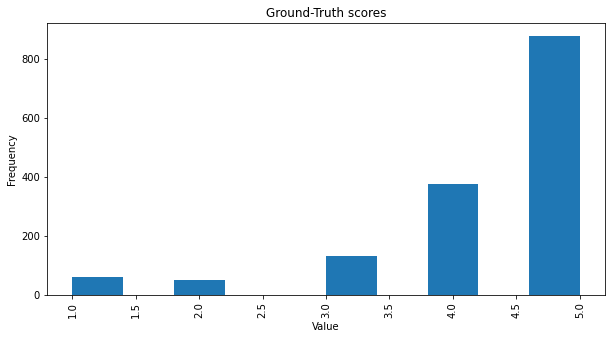

In [ ]:
getHistogram(df_waterloo, "rating", "Ground-Truth scores",figsize=(10,5))

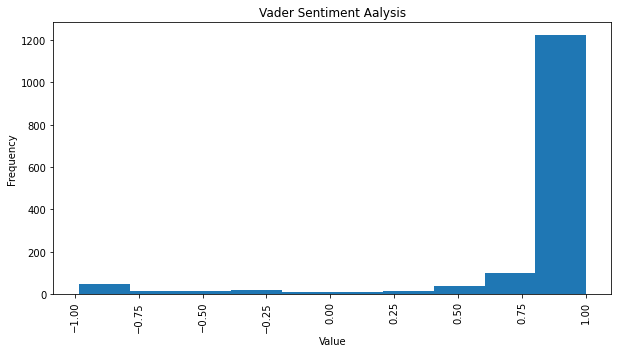

In [ ]:
getHistogram(reviewDF, "vader", "Vader Sentiment Aalysis",figsize=(10,5))

- As we can observe that most of the ratings are on the positive side. This is also reflected in the Vader sentiment as the high bar is between 0.75 and 1.

## (ii) Show a histogram of the number of reviews per hotel

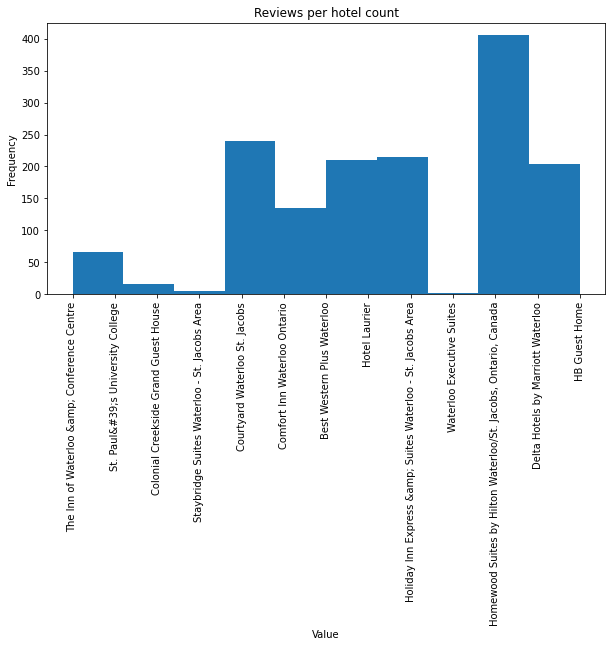

In [ ]:
getHistogram(df_waterloo, "hotel", "Reviews per hotel count",figsize=(10,5))

- As we can see that "Courtyard waterloo st. jacobs" and "Homewood suits" have more number of reviews compared to other hotels. These hotels are located in the same area. That is why they are having high number of reviews. 

## (b): Boxplots

## (i) Boxplots for ground truth star rating and one for Vader sentiment

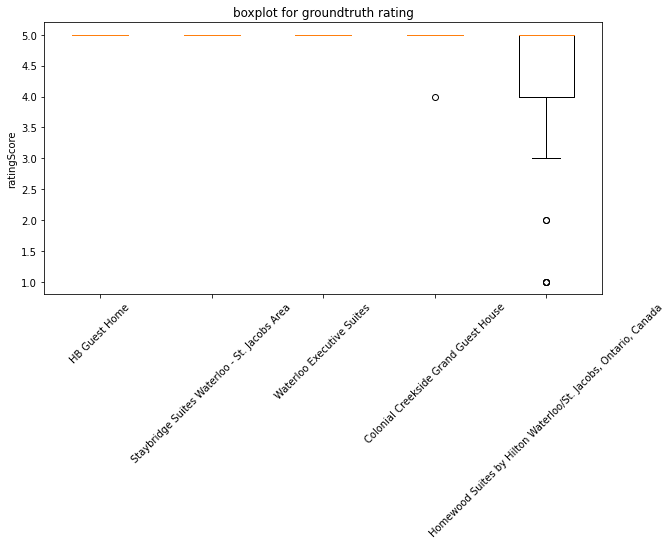

In [ ]:
# how do the ratings compare for 5 hotels?
five_hotels = rating_df_top_5.hotel.values

hotel_list = []
for hotel in five_hotels:
  _hotel = df_waterloo.loc[df_waterloo['hotel'] == hotel]['rating']
  hotel_list.append(_hotel)


# multiple box plots on one figure
plt.figure(figsize=(10,5))
plt.boxplot(hotel_list)
plt.xticks(np.arange(1,6), five_hotels,rotation=45)
plt.ylabel('ratingScore')
plt.title("boxplot for groundtruth rating")
plt.show()

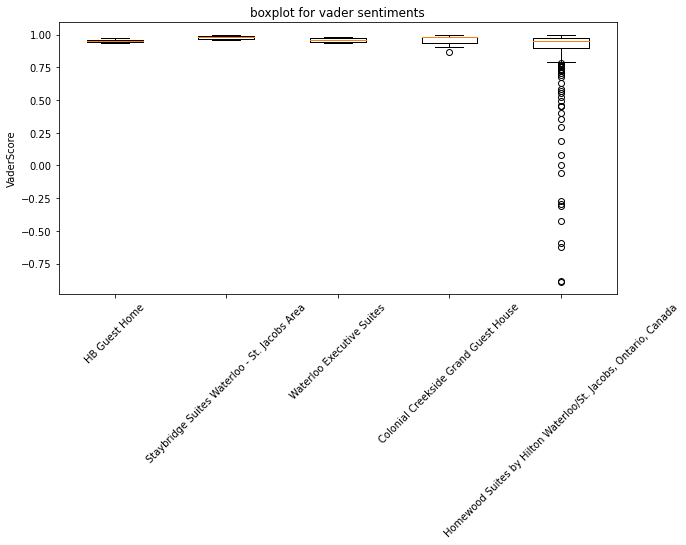

In [ ]:
# how do the ratings compare for 5 hotels?
five_hotels = rating_df_top_5.hotel.values

hotel_list = []
for hotel in five_hotels:
  _hotel = finaldf.loc[finaldf['hotel'] == hotel]['vader']
  hotel_list.append(_hotel)


# multiple box plots on one figure
plt.figure(figsize=(10,5))
plt.boxplot(hotel_list)
plt.xticks(np.arange(1,6), five_hotels,rotation=45)
plt.ylabel('VaderScore')
plt.title("boxplot for vader sentiments")
plt.show()

## (ii): Report the mean and variance of the ground truth and Vader sentiment scores 

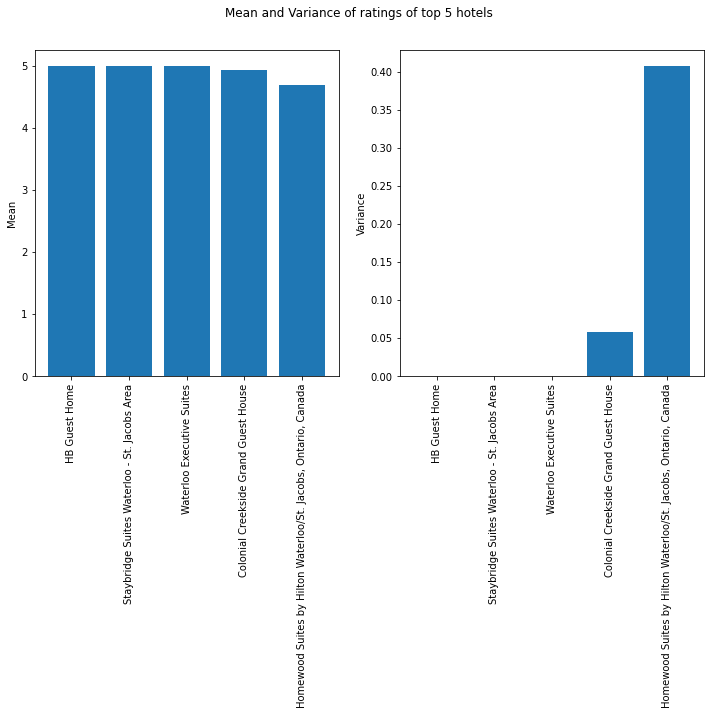

Mean of top 5 hotel's rating: [5.0, 5.0, 5.0, 4.9375, 4.68641975308642]
Variance of top 5 hotel's rating: [0.0, 0.0, 0.0, 0.05859375, 0.4078402682517909]


In [ ]:
# how do the ratings compare for 5 hotels?
five_hotels = rating_df_top_5.hotel.values

mean = []
variance = []
for hotel in five_hotels:
  _hotel = finaldf.loc[finaldf['hotel'] == hotel]['rating']
  m = np.mean(_hotel.values)
  v = np.var(_hotel.values)
  mean.append(m)
  variance.append(v)

#plt.figure(figsize=(10,5))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle('Mean and Variance of ratings of top 5 hotels')
ax1.bar(five_hotels, mean)
ax2.bar(five_hotels, variance)
ax1.set_xticks(five_hotels, minor= False)
ax2.set_xticks(five_hotels, minor= False)
ax1.set_xticklabels(five_hotels, rotation=90)
ax2.set_xticklabels(five_hotels, rotation=90)

ax1.set_ylabel('Mean')
ax2.set_ylabel('Variance')
plt.show()

print("Mean of top 5 hotel's rating:", mean)
print("Variance of top 5 hotel's rating:", variance)

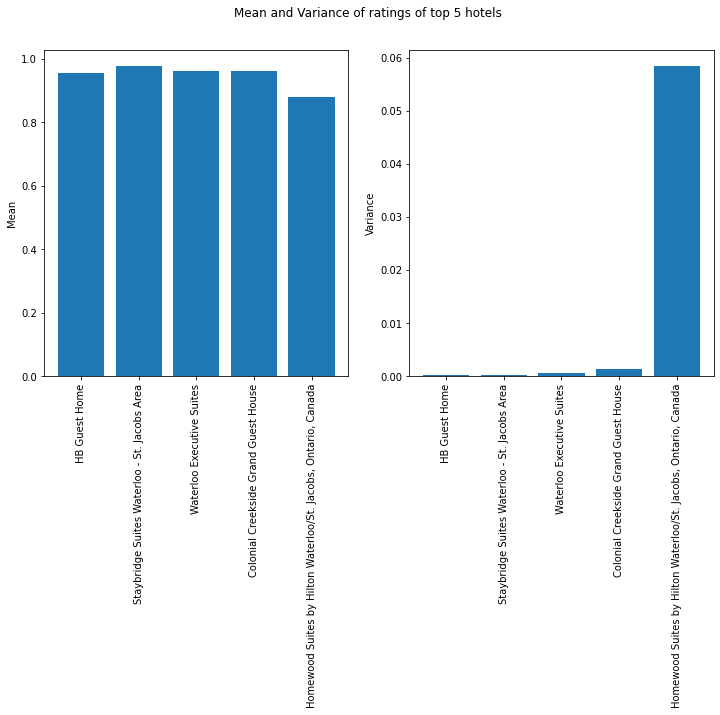

Mean of top 5 hotel's vader: [0.95485, 0.9785600000000001, 0.9603, 0.96199375, 0.8813]
Variance of top 5 hotel's vader: [0.00028056249999999956, 0.00019249040000000032, 0.0005808100000000005, 0.0013186955859375, 0.05857324340740741]


In [ ]:
# how do the ratings compare for 5 hotels?
five_hotels = rating_df_top_5.hotel.values

mean = []
variance = []
for hotel in five_hotels:
  _hotel = finaldf.loc[finaldf['hotel'] == hotel]['vader']
  m = np.mean(_hotel.values)
  v = np.var(_hotel.values)
  mean.append(m)
  variance.append(v)

#plt.figure(figsize=(10,5))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle('Mean and Variance of ratings of top 5 hotels')
ax1.bar(five_hotels, mean)
ax2.bar(five_hotels, variance)
ax1.set_xticks(five_hotels, minor= False)
ax2.set_xticks(five_hotels, minor= False)
ax1.set_xticklabels(five_hotels, rotation=90)
ax2.set_xticklabels(five_hotels, rotation=90)

ax1.set_ylabel('Mean')
ax2.set_ylabel('Variance')
plt.show()

print("Mean of top 5 hotel's vader:", mean)
print("Variance of top 5 hotel's vader:", variance)

- Box plots show minimum, maximum, 25percentile, 75 percentile values, median, and outliers of the data. In one plot we can have these much of the information whereas mean and variance can get influence by outliers. So boxplots are more informative.

## (c) Scatterplots and heatmaps

## (i) Show both a scatterplot and heatmap of ground truth score (star rating) versus Vader sentiment score

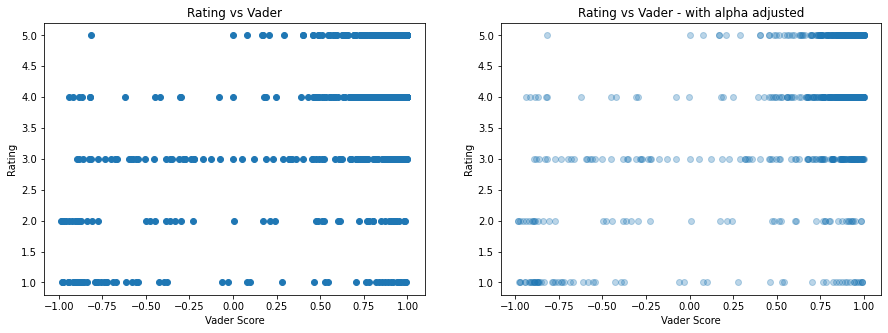

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5),sharex=False,sharey=False)
rating_scores = finaldf['rating'].values
vader_scores = finaldf['vader'].values
ax[0].plot(vader_scores, rating_scores,"o")
ax[1].plot(vader_scores, rating_scores,"o", alpha=0.3)

ax[0].set_title('Rating vs Vader')
ax[1].set_title('Rating vs Vader - with alpha adjusted')

for _ax in ax:
  _ax.set_ylabel('Rating')
  _ax.set_xlabel('Vader Score')

In [ ]:
k = gaussian_kde(np.vstack([vader_scores, rating_scores]))
xi, yi = np.mgrid[vader_scores.min():vader_scores.max():vader_scores.size**0.5*1j,rating_scores.min():rating_scores.max():rating_scores.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0.5, 1.0, 'Rating vs Vader - kernel density')

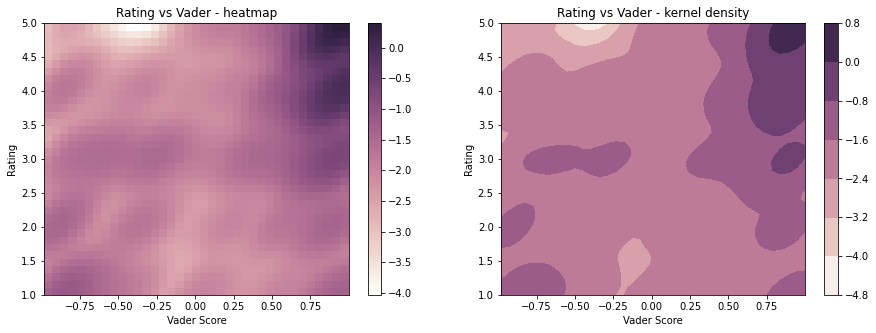

In [ ]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))


b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
b2 = ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(vader_scores.min(), vader_scores.max())
ax1.set_ylim(rating_scores.min(), rating_scores.max())
ax2.set_xlim(vader_scores.min(), vader_scores.max())
ax2.set_ylim(rating_scores.min(), rating_scores.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

fig.colorbar(b1, ax=ax1)
fig.colorbar(b2, ax=ax2)

ax1.set_title('Rating vs Vader - heatmap')
ax2.set_title('Rating vs Vader - kernel density')

-  From the scatter plot we can observe that high-rated reviews have high vader scores whereas for the medium rating(i.e 3 ratings) vader score is distributed from min to max. And for low rating vader score is either concentrated on the minimum size or on maximum side.

## (ii): Show two scatterplots and two heatmaps of the length of reviews versus each of ground truth score and Vader sentiment score

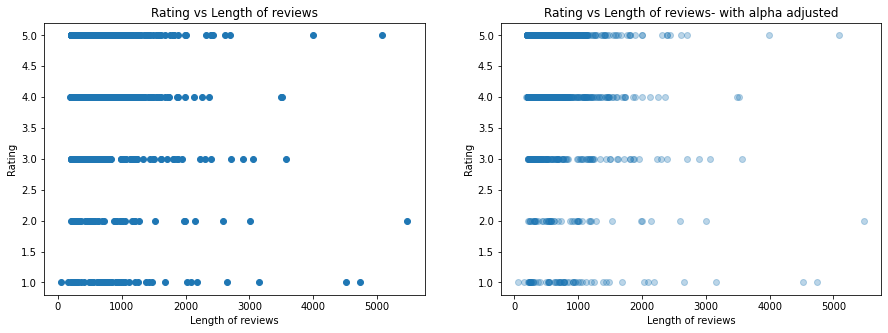

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5),sharex=False,sharey=False)
length_of_reviews = [len(i) for i in finaldf["reviews"].values]
rating_scores = finaldf['rating'].values
ax[0].plot(length_of_reviews,rating_scores,"o")
ax[1].plot(length_of_reviews,rating_scores,"o", alpha=0.3)

ax[0].set_title('Rating vs Length of reviews')
ax[1].set_title('Rating vs Length of reviews- with alpha adjusted')

for _ax in ax:
  _ax.set_ylabel('Rating')
  _ax.set_xlabel('Length of reviews')

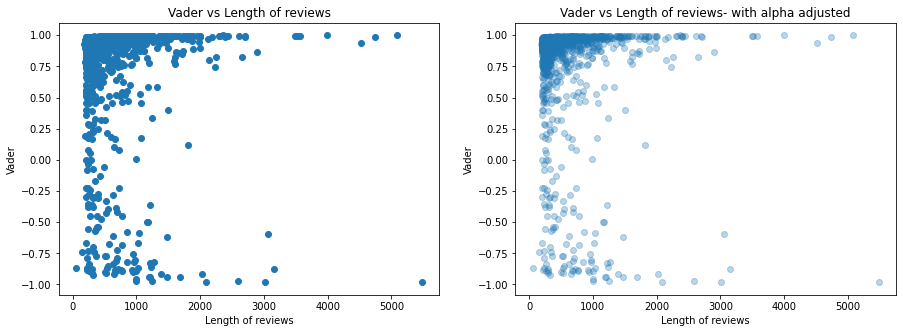

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5),sharex=False,sharey=False)
length_of_reviews = [len(i) for i in finaldf["reviews"].values]
vader_scores = finaldf['vader'].values
ax[0].plot(length_of_reviews,vader_scores,"o")
ax[1].plot(length_of_reviews,vader_scores,"o", alpha=0.3)

ax[0].set_title('Vader vs Length of reviews')
ax[1].set_title('Vader vs Length of reviews- with alpha adjusted')

for _ax in ax:
  _ax.set_ylabel('Vader')
  _ax.set_xlabel('Length of reviews')

Text(0.5, 1.0, 'Rating vs Length of Reviews - kernel density')

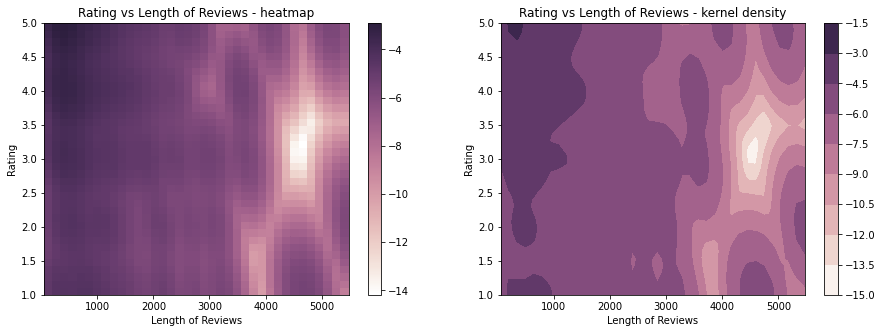

In [ ]:
k = gaussian_kde(np.vstack([length_of_reviews, rating_scores]))
xi, yi = np.mgrid[min(length_of_reviews):max(length_of_reviews):len(length_of_reviews)**0.5*1j,rating_scores.min():rating_scores.max():rating_scores.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))


cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))


b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
b2 = ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(min(length_of_reviews), max(length_of_reviews))
ax1.set_ylim(rating_scores.min(), rating_scores.max())
ax2.set_xlim(min(length_of_reviews), max(length_of_reviews))
ax2.set_ylim(rating_scores.min(), rating_scores.max())

ax1.set_xlabel('Length of Reviews')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Length of Reviews')
ax2.set_ylabel('Rating')

fig.colorbar(b1, ax=ax1)
fig.colorbar(b2, ax=ax2)

ax1.set_title('Rating vs Length of Reviews - heatmap')
ax2.set_title('Rating vs Length of Reviews - kernel density')

Text(0.5, 1.0, 'Vader vs Length of Reviews - kernel density')

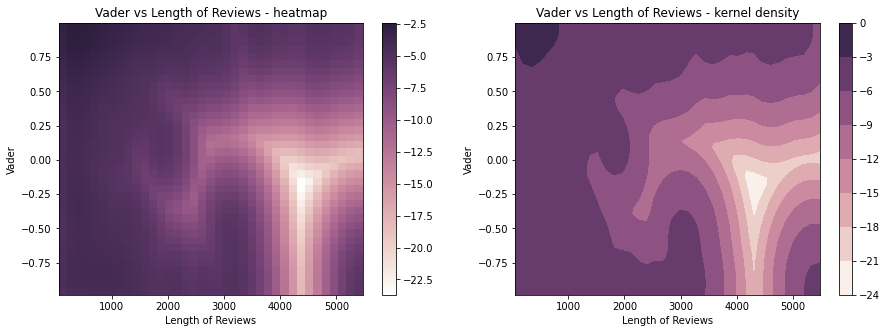

In [ ]:
k = gaussian_kde(np.vstack([length_of_reviews, vader_scores]))
xi, yi = np.mgrid[min(length_of_reviews):max(length_of_reviews):len(length_of_reviews)**0.5*1j,vader_scores.min():vader_scores.max():vader_scores.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))


cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))


b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
b2 = ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(min(length_of_reviews), max(length_of_reviews))
ax1.set_ylim(vader_scores.min(), vader_scores.max())
ax2.set_xlim(min(length_of_reviews), max(length_of_reviews))
ax2.set_ylim(vader_scores.min(), vader_scores.max())

ax1.set_xlabel('Length of Reviews')
ax1.set_ylabel('Vader')

ax2.set_xlabel('Length of Reviews')
ax2.set_ylabel('Vader')

fig.colorbar(b1, ax=ax1)
fig.colorbar(b2, ax=ax2)

ax1.set_title('Vader vs Length of Reviews - heatmap')
ax2.set_title('Vader vs Length of Reviews - kernel density')

- We can observe that there are very few reviews with a length of more than 4000. Most of the rating scores are concentrated at 1000 or below 1000 length reviews.
- The same thing we can observe in the heat map as well. With lower length reviews, rating and Vader scores are concentrated at maximum scores.  

## (iii): Show two scatterplots of the number of reviews per hotel versus each of average ground truth score and average Vader sentiment score

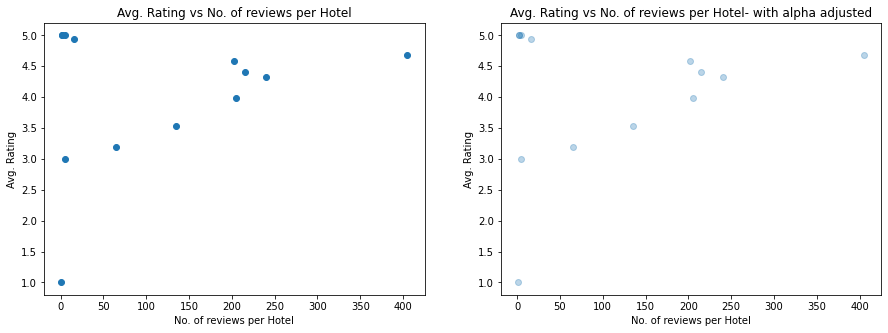

In [ ]:
review_count = pd.DataFrame(hotel_rating.hotel.value_counts())
rating_df = pd.DataFrame(hotel_rating.groupby('hotel')['rating'].mean())
vader_df = pd.DataFrame(hotel_rating.groupby('hotel')['vader'].mean())

rating = []
for i in range(len(review_count.index)):
  for j in range(len(rating_df.index)):
    if review_count.index[i] == rating_df.index[j]:
      avg_rating = rating_df.rating[j]
      rating.append(avg_rating)

vader = []
for i in range(len(review_count.index)):
  for j in range(len(vader_df.index)):
    if review_count.index[i] == vader_df.index[j]:
      avg_vader = vader_df.vader[j]
      vader.append(avg_vader)


fig, ax = plt.subplots(1,2,figsize=(15,5),sharex=False,sharey=False)

ax[0].plot(review_count.hotel.values,rating,"o")
ax[1].plot(review_count.hotel.values,rating,"o", alpha=0.3)

ax[0].set_title('Avg. Rating vs No. of reviews per Hotel')
ax[1].set_title('Avg. Rating vs No. of reviews per Hotel- with alpha adjusted')

for _ax in ax:
  _ax.set_ylabel('Avg. Rating')
  _ax.set_xlabel('No. of reviews per Hotel')


  

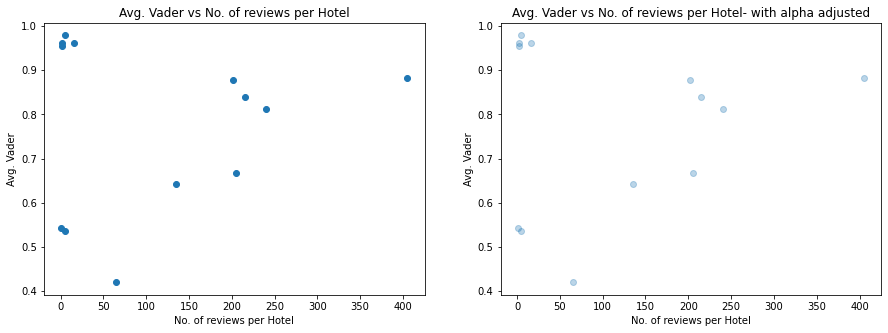

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5),sharex=False,sharey=False)

ax[0].plot(review_count.hotel.values,vader,"o")
ax[1].plot(review_count.hotel.values,vader,"o", alpha=0.3)

ax[0].set_title('Avg. Vader vs No. of reviews per Hotel')
ax[1].set_title('Avg. Vader vs No. of reviews per Hotel- with alpha adjusted')

for _ax in ax:
  _ax.set_ylabel('Avg. Vader')
  _ax.set_xlabel('No. of reviews per Hotel')

- For rating scores, we can observe that fewer reviews either end up having the least score or high score as most of the reviews are of the same class(positive or negative). There is another trend we can observe that number of reviews increases the rating score also increases which is justifiable as a hotel is popular it gets a high number of reviews.
- For Vader scores, there is no particular trend but most of the less number of review hotels has maximum Vader score as they might have all positive reviews. 

## (d): Location-based patterns

In [ ]:
def avg_rating_per_hotel(df):
  # average the scores over all hotels, you may need to provide additional filtering
  tempDf = df[['hotel','vader','rating','reviews']]
  tempDf.columns = ['hotel','AverageVader', 'AverageRatingScore','n_reviews']
  tempDf = tempDf.groupby('hotel').agg({'AverageVader':'mean', 'AverageRatingScore':'mean','n_reviews':'count'})
  return tempDf

In [ ]:
avg_rating_df = avg_rating_per_hotel(finaldf)
avg_rating_df.head()

,AverageVader,AverageRatingScore,n_reviews
hotel,,,
Best Western Plus Waterloo,0.666948,3.990244,205
Colonial Creekside Grand Guest House,0.961994,4.937500,16
Comfort Inn Waterloo Ontario,0.642922,3.525926,135
Courtyard Waterloo St. Jacobs,0.811967,4.333333,240
Delta Hotels by Marriott Waterloo,0.878274,4.579208,202


In [ ]:
def make_address(row):
  # individual columns need to be combined
  return row['streetAddress']+", "+row['city']+", "+row['province']

In [ ]:
# Need the location for each hotel in a format the tool can handle

geo_rating_df = avg_rating_df\
                         .join(df_waterloo.groupby('hotel')\
                         .agg({'streetAddress':'max','city':'max','province':'max','postalcode':'max'}))
geo_rating_df['formed_address'] = geo_rating_df.apply(make_address , axis=1)
geo_rating_df

,AverageVader,AverageRatingScore,n_reviews,streetAddress,city,province,postalcode,formed_address
hotel,,,,,,,,
Best Western Plus Waterloo,0.666948,3.990244,205,547 King St N,Waterloo,Ontario,N2L 5Z7,"547 King St N, Waterloo, Ontario"
Colonial Creekside Grand Guest House,0.961994,4.937500,16,485 Bridge St W,Waterloo,Ontario,N2K 1L5,"485 Bridge St W, Waterloo, Ontario"
Comfort Inn Waterloo Ontario,0.642922,3.525926,135,190 Weber St N,Waterloo,Ontario,N2J 3H4,"190 Weber St N, Waterloo, Ontario"
Courtyard Waterloo St. Jacobs,0.811967,4.333333,240,50 Benjamin Rd,Waterloo,Ontario,N2V 2J9,"50 Benjamin Rd, Waterloo, Ontario"
Delta Hotels by Marriott Waterloo,0.878274,4.579208,202,110 Erb St W,Waterloo,Ontario,N2L 0C6,"110 Erb St W, Waterloo, Ontario"
HB Guest Home,0.954850,5.000000,2,315 Dearborn Blvd,Waterloo,Ontario,N2J 4Y9,"315 Dearborn Blvd, Waterloo, Ontario"
Holiday Inn Express &amp; Suites Waterloo - St. Jacobs Area,0.839919,4.413953,215,14 Benjamin Rd,Waterloo,Ontario,N2V 2J9,"14 Benjamin Rd, Waterloo, Ontario"
"Homewood Suites by Hilton Waterloo/St. Jacobs, Ontario, Canada",0.881300,4.686420,405,45 Benjamin Rd,Waterloo,Ontario,N2V 0C6,"45 Benjamin Rd, Waterloo, Ontario"
Hotel Laurier,0.536200,3.000000,5,200 King Street North Wilfrid Laurier University,Waterloo,Ontario,N2L 3C5,200 King Street North Wilfrid Laurier Universi...


In [ ]:
# 0 - need to give the tool a generic name.
locator = Nominatim(user_agent='myGeocoder')
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2 - form the location string
geo_rating_df['location'] = geo_rating_df['formed_address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
geo_rating_df['point'] = geo_rating_df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
geo_rating_df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(geo_rating_df['point'].tolist(), index=geo_rating_df.index)
geo_rating_df["AverageRatingScore"] = geo_rating_df["AverageRatingScore"].round(decimals = 2)
geo_rating_df.head()

,AverageVader,AverageRatingScore,n_reviews,streetAddress,city,province,postalcode,formed_address,location,point,latitude,longitude,altitude
hotel,,,,,,,,,,,,,
Best Western Plus Waterloo,0.666948,3.99,205,547 King St N,Waterloo,Ontario,N2L 5Z7,"547 King St N, Waterloo, Ontario","(547, King Street North, Waterloo, Region of W...","(43.499198, -80.53084, 0.0)",43.499198,-80.530840,0.0
Colonial Creekside Grand Guest House,0.961994,4.94,16,485 Bridge St W,Waterloo,Ontario,N2K 1L5,"485 Bridge St W, Waterloo, Ontario","(485, Bridge Street West, Eastbridge, Waterloo...","(43.501282149452926, -80.50709860945788, 0.0)",43.501282,-80.507099,0.0
Comfort Inn Waterloo Ontario,0.642922,3.53,135,190 Weber St N,Waterloo,Ontario,N2J 3H4,"190 Weber St N, Waterloo, Ontario","(190, Weber Street North, Waterloo, Region of ...","(43.47557631818182, -80.51752243636363, 0.0)",43.475576,-80.517522,0.0
Courtyard Waterloo St. Jacobs,0.811967,4.33,240,50 Benjamin Rd,Waterloo,Ontario,N2V 2J9,"50 Benjamin Rd, Waterloo, Ontario","(Marriott Courtyard Waterloo St. Jacobs, 50, B...","(43.5063244, -80.55512224588753, 0.0)",43.506324,-80.555122,0.0
Delta Hotels by Marriott Waterloo,0.878274,4.58,202,110 Erb St W,Waterloo,Ontario,N2L 0C6,"110 Erb St W, Waterloo, Ontario","(Delta Waterloo, 110, Erb Street West, Uptown,...","(43.46335635, -80.5283697111089, 0.0)",43.463356,-80.528370,0.0


In [ ]:
map1 = folium.Map(
    location=[43.499198,-80.530840	], # <- this will need to be set based on your own hotels
    tiles='cartodbpositron',
    zoom_start=12,
)

geo_rating_df.dropna().apply(lambda row:folium.Marker(location=[row["latitude"], row["longitude"]] , popup="Avg ground truth rating: "+str(row["AverageRatingScore"])).add_to(map1), axis=1)

geo_rating_df.dropna().apply(lambda row:folium.Marker(location=[row["latitude"], row["longitude"]], icon=DivIcon(icon_size=(500,400), icon_anchor=(8,55) ,html='<div style="font-size: 9pt; color : black">{}</div>'.format(row["AverageRatingScore"]))).add_to(map1), axis=1)

map1



Source: https://python-visualization.github.io/folium/quickstart.html

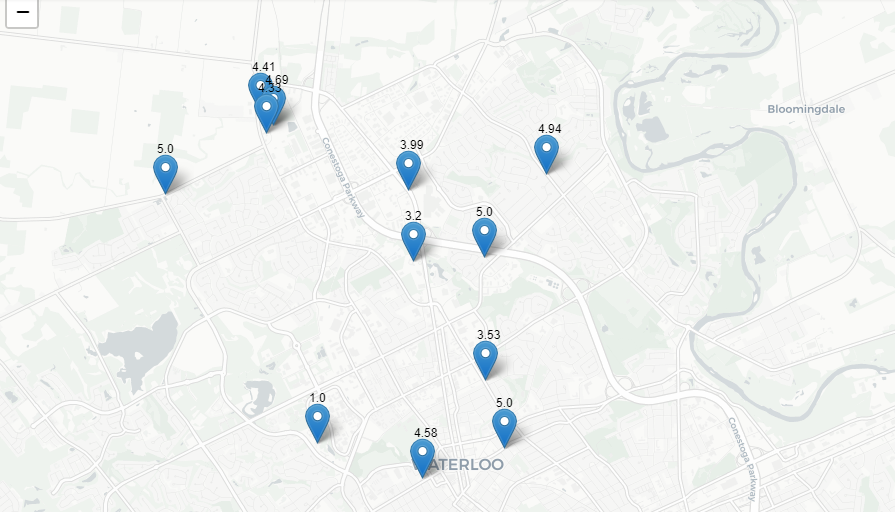

- We can observe that hotels near st. Jacob market get a high avg rating. This jacob market word we have already observed in the topk words and phrases. I would recommend staying in the hotel near St. Jacob market and Benjamin road.

## (e): Temporal analysis:

## (i) Plot the rolling average score as a function of time

In [ ]:
# slicing of six hotel(top 2, mid 2 and bottom 2)
six_hotels = avg_rating_df.sort_values('AverageRatingScore',  ascending=False).iloc[4:10, :]
six_hotels

,AverageVader,AverageRatingScore,n_reviews
hotel,,,
"Homewood Suites by Hilton Waterloo/St. Jacobs, Ontario, Canada",0.881300,4.686420,405
Delta Hotels by Marriott Waterloo,0.878274,4.579208,202
Holiday Inn Express &amp; Suites Waterloo - St. Jacobs Area,0.839919,4.413953,215
Courtyard Waterloo St. Jacobs,0.811967,4.333333,240
Best Western Plus Waterloo,0.666948,3.990244,205
Comfort Inn Waterloo Ontario,0.642922,3.525926,135


In [ ]:
new_df = df_waterloo[(df_waterloo["date_stamp"] != "3 weeks ago") & (df_waterloo["date_stamp"] != "1 week ago") & (df_waterloo["date_stamp"] != "4 weeks ago")  & (df_waterloo["date_stamp"] != "2 weeks ago")]


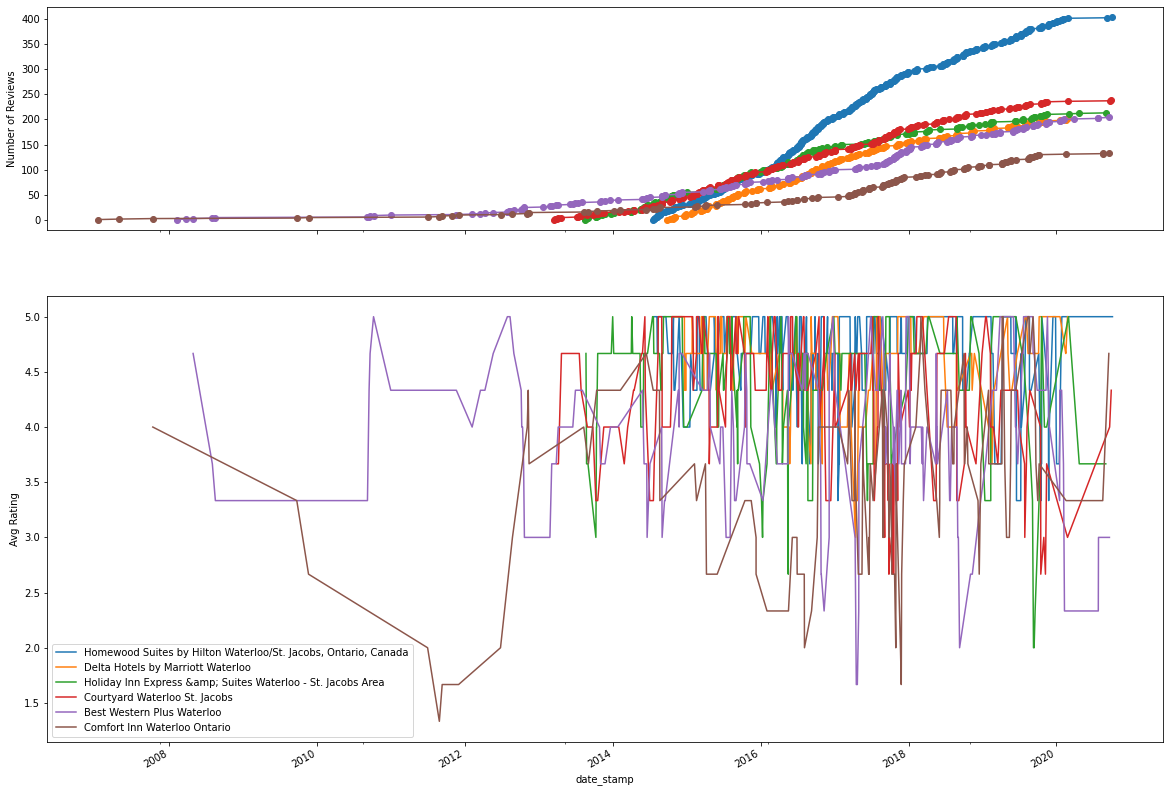

In [ ]:
# It can be useful to see when reviews were being made and how the ratings changed using a running mean
fig, ax = plt.subplots(2, 1, figsize=(20,15),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in six_hotels.index: 
  _df = new_df[new_df['hotel']==hotel].set_index('date_stamp')
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df['count'].cumsum().plot(ax=ax[0],label=hotel, marker='o')
  _df['rating'].rolling(3).mean().plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()

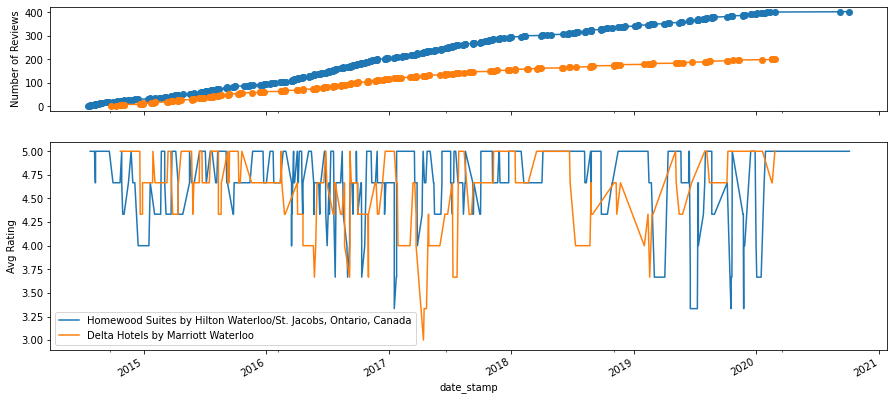

In [ ]:
# It can be useful to see when reviews were being made and how the ratings changed using a running mean
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in six_hotels.index[:2]: 
  _df = new_df[new_df['hotel']==hotel].set_index('date_stamp')
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df['count'].cumsum().plot(ax=ax[0],label=hotel, marker='o')
  _df['rating'].rolling(3).mean().plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()

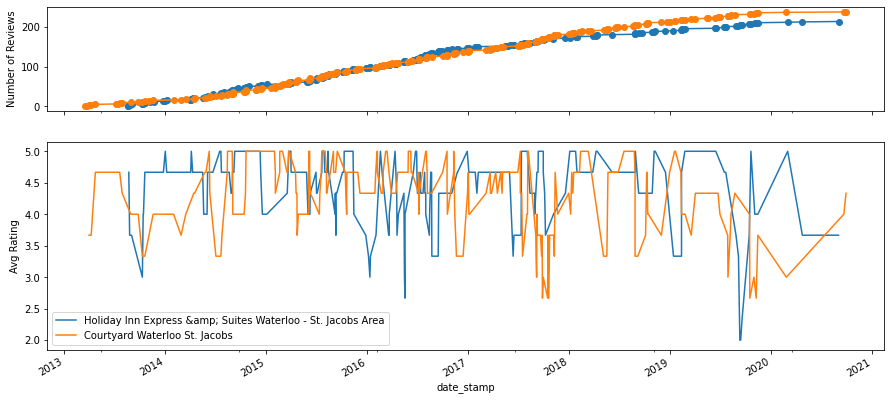

In [ ]:
# It can be useful to see when reviews were being made and how the ratings changed using a running mean
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in six_hotels.index[2:4]: 
  _df = new_df[new_df['hotel']==hotel].set_index('date_stamp')
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df['count'].cumsum().plot(ax=ax[0],label=hotel, marker='o')
  _df['rating'].rolling(3).mean().plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()

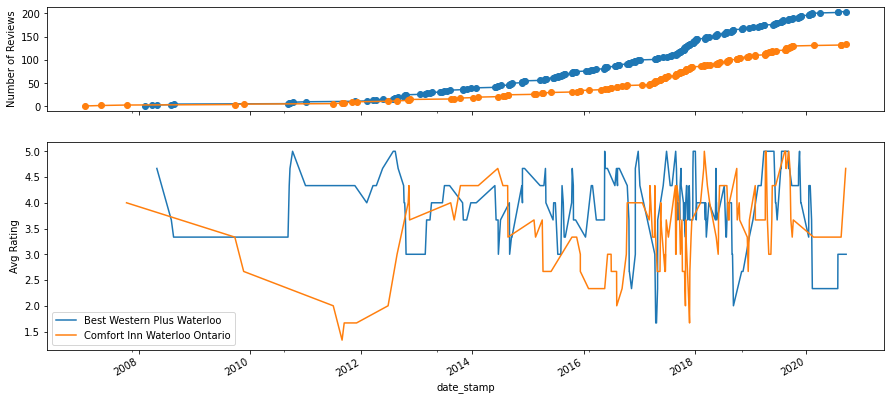

In [ ]:
# It can be useful to see when reviews were being made and how the ratings changed using a running mean
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in six_hotels.index[4:]: 
  _df = new_df[new_df['hotel']==hotel].set_index('date_stamp')
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df['count'].cumsum().plot(ax=ax[0],label=hotel, marker='o')
  _df['rating'].rolling(3).mean().plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()

- We can observe that for both the top 2 and bottom 2 hotels, ratings are not consistent.
- For both top and bottom rated hotels, the ratings highly fluctuate between time 2018 to 2020.
- For top rated initially(2015 to 2017) the rating remained consistent between 4 and 5 but for bottom rated hotels, it has been fluctuating over a period of time. 

## (ii) plot the rate of reviews (i.e., the number of reviews in a fixed time period) for each hotel over time

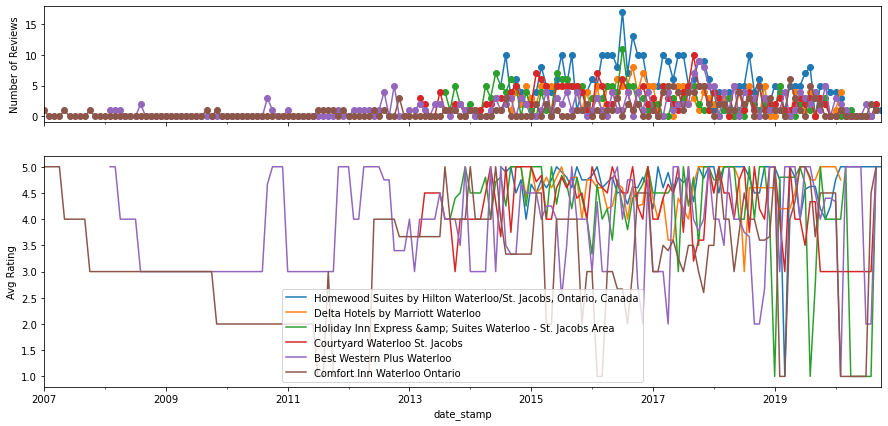

In [ ]:
# It can be useful to see when reviews were being made and how the ratings changed
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in six_hotels.index: 
  _df = new_df[new_df['hotel']==hotel].set_index('date_stamp')
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df_monthly = _df.groupby(pd.Grouper(freq='M')).agg({'count':'sum','rating':'mean'})
  _df_monthly['rating'] = _df_monthly['rating'].fillna(method='ffill') # hold the last rating constant in months with no reviews
  _df_monthly['count'].plot(ax=ax[0],label=hotel, marker='o')
  _df_monthly['rating'].plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()

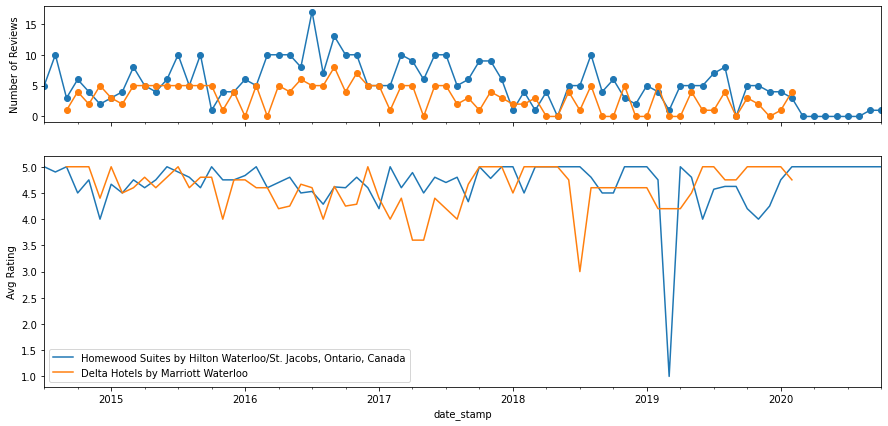

In [ ]:
# It can be useful to see when reviews were being made and how the ratings changed
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in six_hotels.index[:2]: 
  _df = new_df[new_df['hotel']==hotel].set_index('date_stamp')
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df_monthly = _df.groupby(pd.Grouper(freq='M')).agg({'count':'sum','rating':'mean'})
  _df_monthly['rating'] = _df_monthly['rating'].fillna(method='ffill') # hold the last rating constant in months with no reviews
  _df_monthly['count'].plot(ax=ax[0],label=hotel, marker='o')
  _df_monthly['rating'].plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()

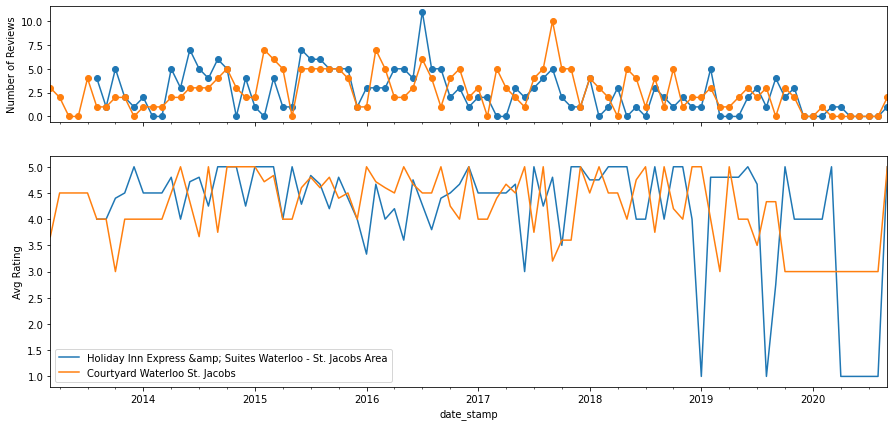

In [ ]:
# It can be useful to see when reviews were being made and how the ratings changed
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in six_hotels.index[2:4]: 
  _df = new_df[new_df['hotel']==hotel].set_index('date_stamp')
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df_monthly = _df.groupby(pd.Grouper(freq='M')).agg({'count':'sum','rating':'mean'})
  _df_monthly['rating'] = _df_monthly['rating'].fillna(method='ffill') # hold the last rating constant in months with no reviews
  _df_monthly['count'].plot(ax=ax[0],label=hotel, marker='o')
  _df_monthly['rating'].plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()

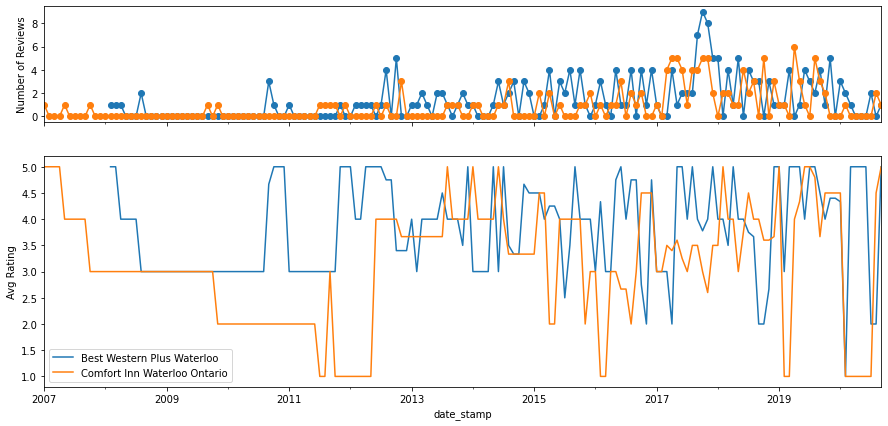

In [ ]:
# It can be useful to see when reviews were being made and how the ratings changed
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in six_hotels.index[4:]: 
  _df = new_df[new_df['hotel']==hotel].set_index('date_stamp')
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df_monthly = _df.groupby(pd.Grouper(freq='M')).agg({'count':'sum','rating':'mean'})
  _df_monthly['rating'] = _df_monthly['rating'].fillna(method='ffill') # hold the last rating constant in months with no reviews
  _df_monthly['count'].plot(ax=ax[0],label=hotel, marker='o')
  _df_monthly['rating'].plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()

- We can observe that avg. number of reviews are high between the period 2016 and 2019. After 2019 it goes down which is obvious as from 2020 due to the covid pandemic there has been a drastic downfall in the hotel industry. 